What does the value function do? It gives a value for a state, by approximating how much rewards it will receive on being on that state. \
On which state you are is dependent on the policy. So, the value function even though it takes states as inputs and treats the policy as a constant, it may determine how good the policy is. 

Policy evaluation: Understanding the value of the policy by determining the value of states. \
Given a policy $\pi$, a certain action is chosen. When the action is chosen, the state changes from $s$ to $s'$. \
When the agent has gotten itself to state $s$, the value of the state is revisited by the immediate reward received. However, the reward is not associated with coming to the state, it is associated with the action it takes. Hence the reward is a function of both the present state and the action taken: $R(s,a)$. \
The value of this state, and the policy is also dependent on the quality/value of the next state it goes not after taking that action. Therefore, it is an iterative process. 
All these iterations follow the same policy $\pi$.

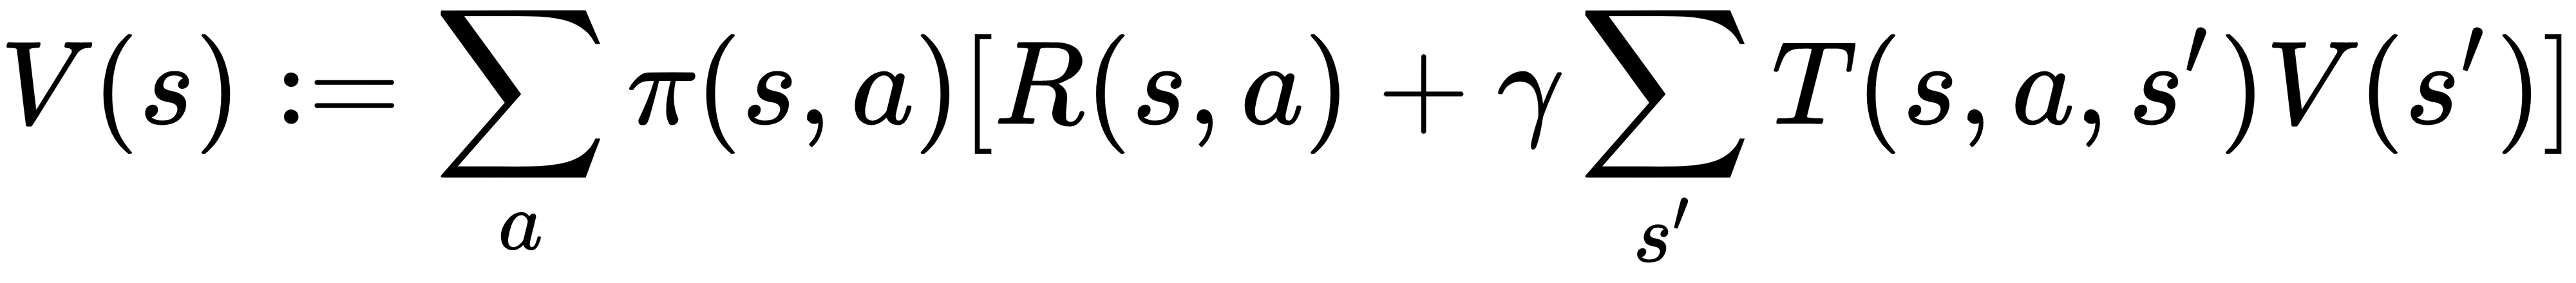

In [1]:
import torch

In [2]:
T = torch.tensor([[[0.8, 0.1, 0.1],
                  [0.1, 0.6, 0.3]],
                  [[0.7, 0.2, 0.1],
                   [0.1, 0.8, 0.1]],
                  [[0.6, 0.2, 0.2],
                   [0.1, 0.4, 0.5]]]) # transition matrix

In [3]:
R = torch.tensor([1., 0, -1.])  # Here reward is only a function of state here
gamma = 0.5
threshold = 0.0001
policy_optimal = torch.tensor([[1.0, 0.0],
                                [1.0, 0.0],
                                [1.0, 0.0]])  # Here we are deciding the optimal policy and optimizing for the policy

Note that policy is just a distribution of actions

In [5]:
def policy_evaluation(policy, trans_matrix, rewards, gamma, threshold):
    """
    Perform policy evaluation
    @param policy: policy matrix containing actions and their probability in each state
    @param trans_matrix: transformation matrix
    @param rewards: rewards for each state
    @param gamma: discount factor
    @param threshold: the evaluation will stop once values for all states are less than the threshold
    @return: values of the given policy for all possible states
    """
    n_state = policy.shape[0]
    iteration=0
    V = torch.zeros(n_state)  # at first the value of all states = 0
    while True:
        V_temp = torch.zeros(n_state)
        for state, actions in enumerate(policy):
            for action, action_prob in enumerate(actions):
                V_temp[state] += action_prob * (R[state] +  gamma * torch.dot(trans_matrix[state, action], V))
        max_delta = torch.max(torch.abs(V - V_temp))  # This is done to check if change is happening to the value. If value has converged, stop the iterations.
        V = V_temp.clone()
        iteration+=1
        if max_delta <= threshold:
            break
    print(f"Total iterations = {iteration}")
    return V


In [9]:
V = policy_evaluation(policy_optimal, T, R, gamma, threshold)
print("The value function under the optimal policy is:\n{}".format(V)) # Value of each state is returned, note that the policy has not changed. And it correlates with the reward function: [1., 0, -1.]

Total iterations = 14
The value function under the optimal policy is:
tensor([ 1.6786,  0.6260, -0.4821])


## Now lets make the policy random

In [10]:
policy_random = torch.tensor([[0.5, 0.5],
                               [0.5, 0.5],
                               [0.5, 0.5]])

In [12]:
V = policy_evaluation(policy_random, T, R, gamma, threshold)
print("The value function under the optimal policy is:\n{}".format(V))

Total iterations = 13
The value function under the optimal policy is:
tensor([ 1.2348,  0.2691, -0.9013])


Note: \
Even with a random policy, the state values are correlated with the rewards

In [13]:
def policy_evaluation_history(policy, trans_matrix, rewards, gamma, threshold):
    n_state = policy.shape[0]
    V = torch.zeros(n_state)
    V_his = [V]  # This is a new line
    i = 0
    while True:
        V_temp = torch.zeros(n_state)
        i += 1
        for state, actions in enumerate(policy):
            for action, action_prob in enumerate(actions):
                V_temp[state] += action_prob * (R[state] + gamma * torch.dot(trans_matrix[state, action], V))
        max_delta = torch.max(torch.abs(V - V_temp))
        V = V_temp.clone()
        V_his.append(V)  # This is a new line
        if max_delta <= threshold:
            break
    return V, V_his

In [14]:
V, V_history = policy_evaluation_history(policy_optimal, T, R, gamma, threshold)

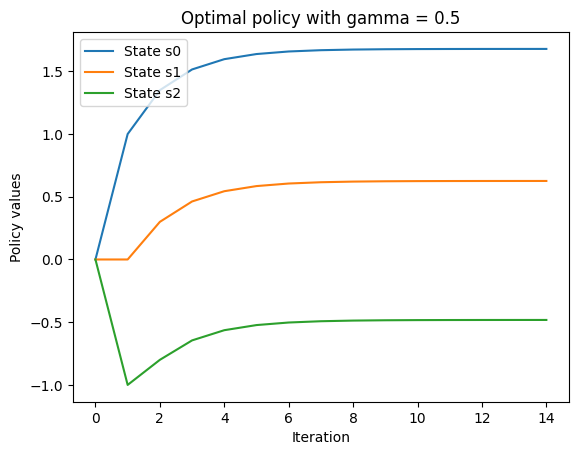

In [15]:
import matplotlib.pyplot as plt
s0, = plt.plot([v[0] for v in V_history])
s1, = plt.plot([v[1] for v in V_history])
s2, = plt.plot([v[2] for v in V_history])
plt.title('Optimal policy with gamma = {}'.format(str(gamma)))
plt.xlabel('Iteration')
plt.ylabel('Policy values')
plt.legend([s0, s1, s2],
           ["State s0", "State s1", "State s2"], 
           loc="upper left")
plt.show()

This plot shows the evolution of the each state's valuation

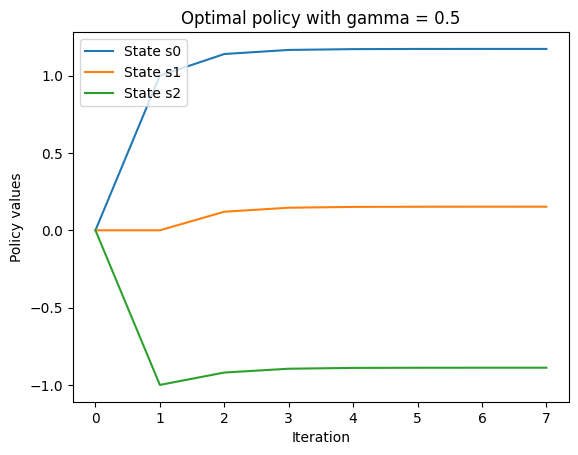

In [16]:
V, V_history = policy_evaluation_history(policy_optimal, T, R, 0.2, threshold) # gamma = 0.2
s0, = plt.plot([v[0] for v in V_history])
s1, = plt.plot([v[1] for v in V_history])
s2, = plt.plot([v[2] for v in V_history])
plt.title('Optimal policy with gamma = {}'.format(str(gamma)))
plt.xlabel('Iteration')
plt.ylabel('Policy values')
plt.legend([s0, s1, s2],
           ["State s0", "State s1", "State s2"], 
           loc="upper left")
plt.show()

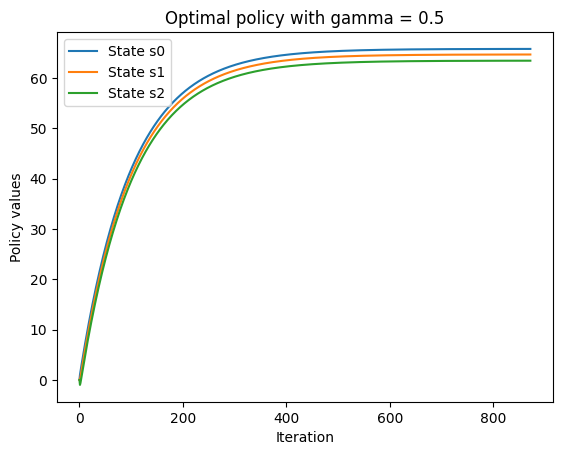

In [17]:
V, V_history = policy_evaluation_history(policy_optimal, T, R, 0.99, threshold) # gamma = 0.99
s0, = plt.plot([v[0] for v in V_history])
s1, = plt.plot([v[1] for v in V_history])
s2, = plt.plot([v[2] for v in V_history])
plt.title('Optimal policy with gamma = {}'.format(str(gamma)))
plt.xlabel('Iteration')
plt.ylabel('Policy values')
plt.legend([s0, s1, s2],
           ["State s0", "State s1", "State s2"], 
           loc="upper left")
plt.show()

What is the difference? \
When using a low gamma value, value of each state is not affected by a great extent by the previous state. It only focusses on the rewards. \
When using a high gamma value, value of each state is more affected by the value previously. Also, it takes longer to converge. 